In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16

Descomprimimos y organizamos las imagenes de train 

In [3]:

zip_path = r'C:\Users\wipip\OneDrive\Documentos\GitHub\Clasificador-de-imagenes--main\data\raw\train.zip'  # Ajusta esto según tu sistema

extract_dir = r'C:\Users\wipip\OneDrive\Documentos\GitHub\Clasificador-de-imagenes--main\data\train_unzipped'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

base_dir = r'C:\Users\wipip\OneDrive\Documentos\GitHub\Clasificador-de-imagenes--main\data\organized'
os.makedirs(os.path.join(base_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'dog'), exist_ok=True)
for filename in os.listdir(extract_dir):
    if 'cat' in filename:
        shutil.move(os.path.join(extract_dir, filename), os.path.join(base_dir, 'cat', filename))
    elif 'dog' in filename:
        shutil.move(os.path.join(extract_dir, filename), os.path.join(base_dir, 'dog', filename))


In [4]:
dataset_dir = r'C:\Users\wipip\OneDrive\Documentos\GitHub\Clasificador-de-imagenes--main\data\train_unzipped\train'

base_dir = r'C:\Users\wipip\OneDrive\Documentos\GitHub\Clasificador-de-imagenes--main\data\organized'
os.makedirs(os.path.join(base_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'dog'), exist_ok=True)

for filename in os.listdir(dataset_dir):
    if 'cat' in filename:
        shutil.move(os.path.join(dataset_dir, filename), os.path.join(base_dir, 'cat', filename))
    elif 'dog' in filename:
        shutil.move(os.path.join(dataset_dir, filename), os.path.join(base_dir, 'dog', filename))

print("Imágenes organizadas en carpetas 'cat' y 'dog'.")

Imágenes organizadas en carpetas 'cat' y 'dog'.


In [5]:
train_dir = r'C:\Users\wipip\OneDrive\Documentos\GitHub\Clasificador-de-imagenes--main\data\organized'
datagentrain = ImageDataGenerator(rescale=1./255, validation_split=0.2)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Vamos a compilar el modelo utilizanod una funcion de perdida de entropia cruzada categorica porque tenemos dos clases y optimizaremos utilizando el algoritmo adam debido a que este presenta alta eficiencia en problemas como el que estamos haciendo de clasificacion de imagenes

In [14]:
image_size = (200, 200)

In [15]:
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,  # Mantener tamaño a 200x200
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


Found 20000 images belonging to 2 classes.


In [16]:
validation_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5000 images belonging to 2 classes.


In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Vamos a entrenar el modelo y utilizaremos 2 callbacks en este punto, model checkpoint para que se guarde el modelo con la mejor precision de validacion y early stopping para que el modelo se detenga si no tenemos mejoras en 5 epocas consecutivas

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Dos clases: gato y perro


In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [22]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)


In [23]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=5,  # Reducir las épocas para probar más rápido
    steps_per_epoch=100,  # Puedes ajustar esto según la cantidad de datos que tengas
    validation_steps=50,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/5


c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 649ms/step - accuracy: 0.5156 - loss: 0.7256
Epoch 1: val_accuracy improved from -inf to 0.63937, saving model to best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 959ms/step - accuracy: 0.5159 - loss: 0.7253 - val_accuracy: 0.6394 - val_loss: 0.6443
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.6106 - loss: 0.6474
Epoch 2: val_accuracy improved from 0.63937 to 0.71625, saving model to best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 709ms/step - accuracy: 0.6108 - loss: 0.6473 - val_accuracy: 0.7163 - val_loss: 0.5806
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.6908 - loss: 0.5892
Epoch 3: val_accuracy did not improve from 0.71625
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 558ms/step - accuracy: 0.6907 - loss: 0.5892 - val_accuracy: 0.7031 - val_loss: 0.5701
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6916 - loss: 0.5713
Epoch 4: val_accuracy improved from 0.71625 to 0.73500, saving model to bes

c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 409ms/step - accuracy: 0.6917 - loss: 0.5712 - val_accuracy: 0.7350 - val_loss: 0.5586
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.7091 - loss: 0.5654
Epoch 5: val_accuracy improved from 0.73500 to 0.75500, saving model to best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 469ms/step - accuracy: 0.7092 - loss: 0.5652 - val_accuracy: 0.7550 - val_loss: 0.5074


In [25]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [26]:
vgg16_base.trainable = False

In [27]:
model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  # Para dos clases: gato y perro
])

In [28]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [29]:
checkpoint = ModelCheckpoint('best_model_vgg16.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)


In [31]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=5,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8975 - loss: 0.2400
Epoch 1: val_accuracy improved from -inf to 0.92580, saving model to best_model_vgg16.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 1271s 2s/step - accuracy: 0.8975 - loss: 0.2400 - val_accuracy: 0.9258 - val_loss: 0.1826
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9441 - loss: 0.1376
Epoch 2: val_accuracy did not improve from 0.92580
625/625 ━━━━━━━━━━━━━━━━━━━━ 1276s 2s/step - accuracy: 0.9440 - loss: 0.1376 - val_accuracy: 0.9092 - val_loss: 0.2174
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9552 - loss: 0.1092
Epoch 3: val_accuracy did not improve from 0.92580
625/625 ━━━━━━━━━━━━━━━━━━━━ 1274s 2s/step - accuracy: 0.9552 - loss: 0.1092 - val_accuracy: 0.9054 - val_loss: 0.2395
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9660 - loss: 0.0892
Epoch 4: val_accuracy did not improve from 0.92580
625/625 ━━━━━━━━━━━━━━━━━━━━ 1248s 2s/step - accuracy: 0.9660 

Graficamos precision y perdida del modelo para visualizar mejor el desempenio de este

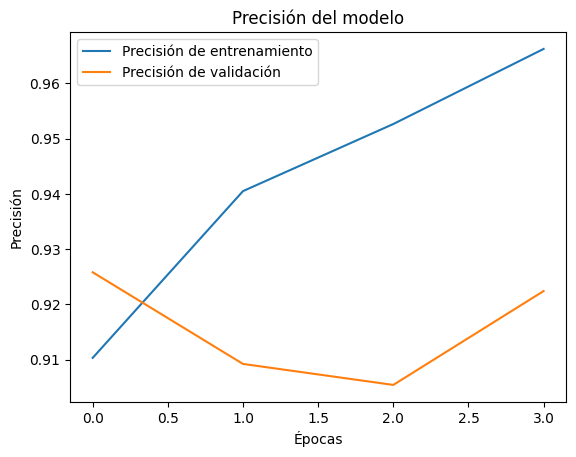

In [32]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


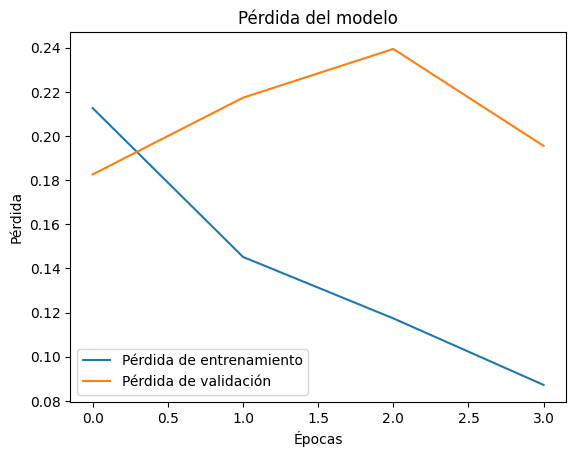

In [33]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

En este punto podemos ver que nuestro modelo de clasificacion de imagenes utilizando redes neuronales aumento su rendimiento con la optimizacion, inicialmente utilizamos un modelo CNN basico con capas convolucionales y de pooling, seguido de capas densas, esto nos sirvio como punto de partida, pero unicamente nos dio una precision alrededor del 70% utiizando 5 epocas debido al costo computacional de entrenar el modelo con mas instancias.
Posteriormente se utilizo transfer learnig para optimizar, de esta forma logramos mejorar la precision partiendo de un modelo preentrenado como el VGG16, llegando a un rango de 92% a 96%.
Este enfoque fue lo que nos permitio tanto mejorar la precision del modelo como reducir el costo computacional y tiempo de procesamiento por lo que se considera un exito.
